<a href="https://colab.research.google.com/github/keilabcs/IN1024-2020-1-UFPE/blob/main/Exerc%C3%ADcio_Pr%C3%A1tico_Cap%C3%ADtulo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Pernambuco
Centro de Informática - Cin

Programa de Pós-Graduação

IN1024 - Processamento de Imagens

Keila Barbosa Costa dos Santos


---

### **Exercício Prático Capítulo 5** - Restauração de Imagens


---


1. Um fotógrafo ao tirar diversas fotos com sua câmera, notou que todas as imagens apresentam um certo tipo de ruído. Ao analisar melhor, o fotógrafo notou que o ruído independe da imagem, então, para ajudar na remoção de ruído ele tirou uma foto de um color chart.

Segue um exemplo de imagem tirada pelo fotógrafo (strawberries coffee) e do color chart (bar)

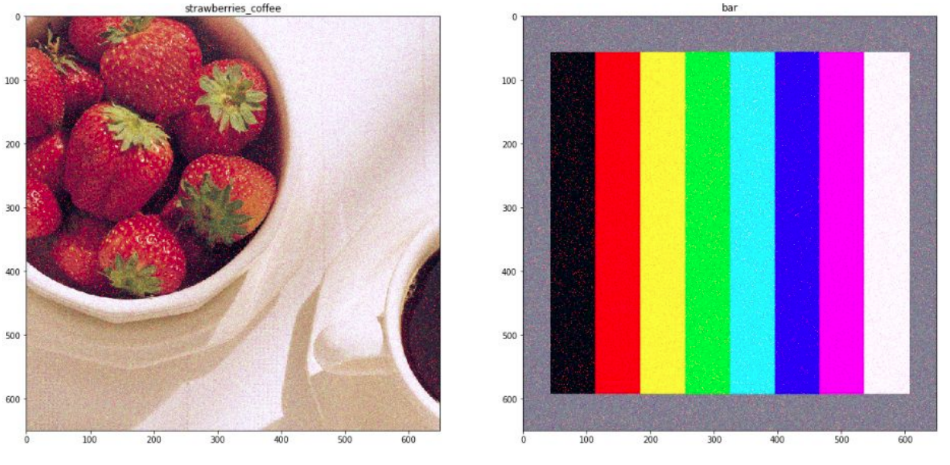

Ao fazer uma análise do ruído notou-se que cada canal da imagem RGB possui um ruído diferente, podendo ser: sal, pimenta, sal e pimenta, gaussiano, gamma ou uniforme.
O fotógrafo lhe pediu para restaurar a imagem acima e para isto lhe enviou tanto a imagem ruidosa quanto o color chart que apresenta o mesmo ruído.

Etapas:

1) Analise os três canais das imagens e identifique qual ruído está presente em cada canal e faça uma breve explicação de por que você acha que o determinado tipo de ruído está presente nesse canal.

In [ ]:
# Ruído é uma variação aleatória das informações de brilho ou cor presentes em uma imagem.
# O ruído presente em cada canal é:
# Canal R - Ruído pimenta
# Canal G - Ruído sal
# Canal B - Ruído gamma

# Onde podemos notar a existência aleatória de pixel branco e preto na imagem.
# Uma imagem contendo ruído sal-e-pimenta terá pixels escuros em regiões brilhantes e pixels brilhantes em regiões escuras. 
# Este tipo de ruído pode ser causada por conversor analógico-digital erros, erros de bits na transmissão, etc. 
# Pode-se principalmente eliminado usando subtração quadro escuro, filtragem média e interpolando torno escuras/pixels brilhantes.

2) Utilize as técnicas aprendidas (Cap 5 do livro) para restaurar a imagem, utilizando técnicas diferentes para cada tipo de ruído, sendo pelo menos uma delas um filtro adaptativo.

In [ ]:
# Carregando pacotes 
import matplotlib.pyplot as plt
from scipy import misc
import cv2
import numpy as np
from pylab import *
import time

In [ ]:
# Download Images
from google.colab import files
pbfile = files.upload()

Saving strawberries_coffee.png to strawberries_coffee.png
Saving color_bar.png to color_bar.png
Saving strawberries_coffee_noise.png to strawberries_coffee_noise.png


In [ ]:
!ls -la

total 1408
drwxr-xr-x 1 root root   4096 Sep 19 23:23 .
drwxr-xr-x 1 root root   4096 Sep 19 21:24 ..
-rw-r--r-- 1 root root   5836 Sep 19 23:23 color_bar.png
drwxr-xr-x 1 root root   4096 Sep 16 16:29 .config
drwxr-xr-x 1 root root   4096 Sep 16 16:29 sample_data
-rw-r--r-- 1 root root 971529 Sep 19 23:23 strawberries_coffee_noise.png
-rw-r--r-- 1 root root 441238 Sep 19 23:23 strawberries_coffee.png


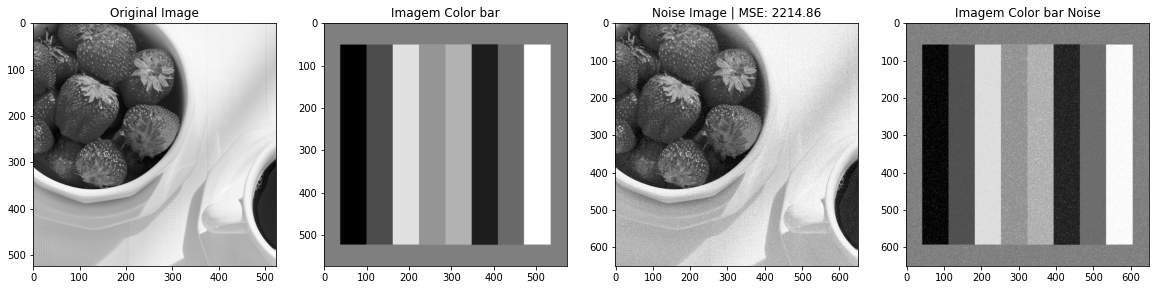

In [ ]:
# Lendo imagem em tons de cinza
img = cv2.imread("strawberries_coffee.png", 0)
# Lendo imagem em tons de cinza noise
img2 = cv2.imread("strawberries_coffee_noise.png", 0)

# Lendo imagem em color bar 
img3 = cv2.imread("color_bar.png", 0)
# Lendo imagem color bar noise
img4 = cv2.imread("bar_noise.png", 0)

plt.figure(figsize = (20,10))
plt.subplot(141);plt.title("Original Image");plt.imshow(img, cmap='gray')
plt.subplot(142);plt.title("Imagem Color bar");plt.imshow(img3, cmap='gray')

plt.subplot(143);plt.title(f"Noise Image | MSE: {mse_noise:0.2f}");plt.imshow(img2, cmap='gray')
plt.subplot(144);plt.title("Imagem Color bar Noise");plt.imshow(img4, cmap='gray')

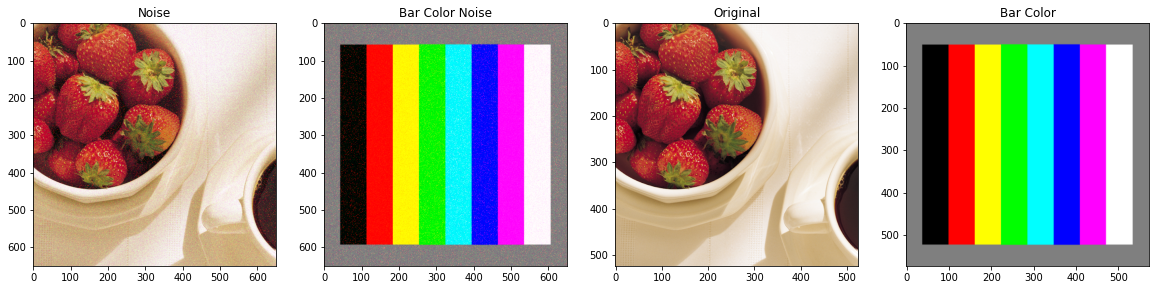

In [ ]:
img5 = cv2.imread("strawberries_coffee_noise.png")
imgcolor = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

img6 = cv2.imread("bar_noise.png")
imgcolor2 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

img7 = cv2.imread("strawberries_coffee.png")
imgcolor3 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)

img8 = cv2.imread("color_bar.png")
imgcolor4 = cv2.cvtColor(img8, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20,10))
plt.subplot(141);plt.title("Noise");plt.imshow(imgcolor)
plt.subplot(142);plt.title("Bar Color Noise");plt.imshow(imgcolor2)
plt.subplot(143);plt.title("Original");plt.imshow(imgcolor3)
plt.subplot(144);plt.title("Bar Color");plt.imshow(imgcolor4)

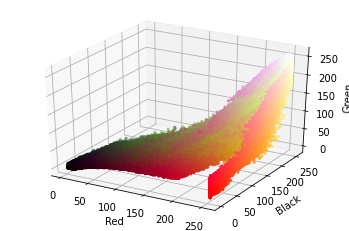

In [ ]:
# Gráfico de dispersão colorido para imagem RGB
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(imgcolor)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgcolor.reshape((np.shape(imgcolor)[0]*np.shape(imgcolor)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Black")
axis.set_zlabel("Green")
plt.show()

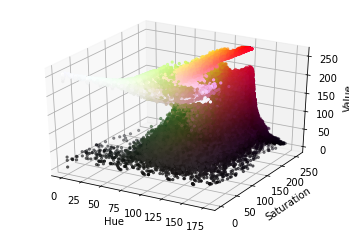

In [ ]:
# Gerando o gráfco de dispersão 3D colorido para a imagem em HSV
hsv_img = cv2.cvtColor(img5, cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
def get_contra_harmonic_pixel(src, x, y, Q, M):
    
    numerator   = np.sum(np.power(src[y-M: y+M, x-M:x+M], Q+1))
    denominator = np.sum(np.power(src[y-M: y+M, x-M:x+M], Q))

    if   denominator == 0 and numerator == 0: return 0
    if   denominator == 0 : return 255
    if   numerator   == np.inf and denominator != np.inf: return 255
    if   numerator   == np.inf or denominator == np.inf: return 0
    if   numerator   != numerator or denominator != denominator: return 0 

    filter_val  = numerator/denominator
    
    return filter_val

def apply_contra_harmonic_filter(src, Q, M, use_float=False):
    if use_float:
      src = src/255.0
    src_w_border = cv2.copyMakeBorder(src, M, M, M, M, borderType=cv2.BORDER_REFLECT)
    dst = np.ones_like(src_w_border) * 255
    height, width, *_ = src_w_border.shape

    for col in (range(M, width-M)):
        for row in range(M, height-M):
            dst[row, col] = get_contra_harmonic_pixel(src_w_border, col, row, Q, M)
    dst = dst[M:height-M, M:width-M]

    if use_float:
      return (dst *255).astype(np.uint8)
    
    return dst

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


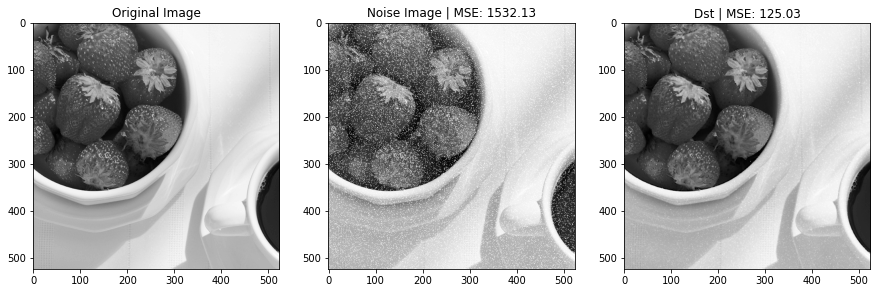

In [ ]:
src = cv2.imread("strawberries_coffee.png", 0)

noise_src      = src.copy()
P, M, Q        = 0.1, 1, -3.5
noise_prob     = np.random.rand(*src.shape)
noise_val      = noise_prob < P
noise_src[noise_val] = 255

dst = apply_contra_harmonic_filter(noise_src, Q, M)

mse_noise = np.mean((src.astype(np.int) - noise_src) ** 2)
mse_dst   = np.mean((src.astype(np.int) - dst) ** 2)

plt.figure(figsize = (15,8))
plt.subplot(131);plt.title("Original Image");plt.imshow(src, cmap='gray')
plt.subplot(132);plt.title(f"Noise Image | MSE: {mse_noise:0.2f}");plt.imshow(noise_src, cmap='gray')
plt.subplot(133);plt.title(f"Dst | MSE: {mse_dst:0.2f}");plt.imshow(dst, cmap='gray')

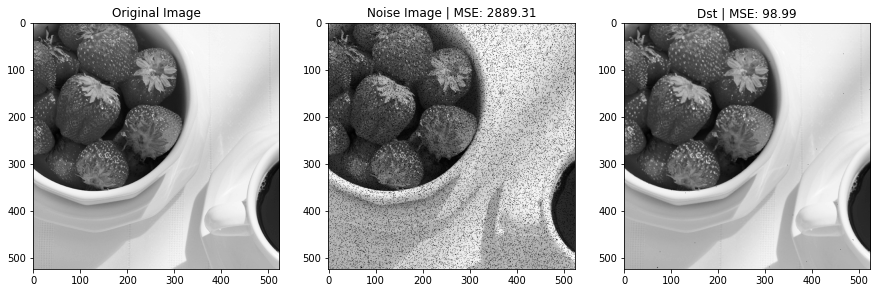

In [ ]:
noise_src      = src.copy()
P, M, Q        = 0.1, 1, 3.5
noise_prob     = np.random.rand(*src.shape)
noise_val      = noise_prob < P
noise_src[noise_val] = 0

dst = apply_contra_harmonic_filter(noise_src, Q, M) # Restauração com Filtro Contra-Harmônica

mse_noise = np.mean((src.astype(np.int) - noise_src) ** 2)
mse_dst   = np.mean((src.astype(np.int) - dst) ** 2)

plt.figure(figsize = (15,8))
plt.subplot(131);plt.title("Original Image");plt.imshow(src, cmap='gray')
plt.subplot(132);plt.title(f"Noise Image | MSE: {mse_noise:0.2f}");plt.imshow(noise_src, cmap='gray')
plt.subplot(133);plt.title(f"Dst | MSE: {mse_dst:0.2f}");plt.imshow(dst, cmap='gray')

### Filtro adaptativo médio

Filtros adaptativos – o seu comportamento adapta-se às características da região processada. 

In [ ]:
def get_salt_pepper_noise(src, P, use_salt=True, use_pepper=True):
    src_noise = src.copy()
    noise     = np.random.rand(*src.shape)
    p_p       = noise < P/2
    p_s       = np.all(((P > noise), (noise  > P/2)),axis=0)
    
    if use_salt:
        src_noise[p_p]  = 0
    if use_pepper:
        src_noise[p_s]  = 255
    return src_noise

def get_neighborhood(src, x, y, m):
    neigh = src[y-m: y+m+1, x-m:x+m+1] 
    return neigh

def get_min_med_max(neigh):
    min_val  = np.min(neigh)
    med_val  = np.median(neigh)
    max_val  = np.max(neigh)
    
    return min_val, med_val, max_val

def adaptive_median_filter(src, M_MAX):
    src_noise_wb      = cv2.copyMakeBorder(src, M_MAX, M_MAX, M_MAX, M_MAX, borderType=cv2.BORDER_REFLECT).astype(np.int)
    dst               = np.zeros_like(src_noise_wb, dtype=np.int)
    height, width, *_ = dst.shape

    for col in (range(M_MAX, width-M_MAX)):
        for row in range(M_MAX, height-M_MAX):
            dst[row, col] = stage_A(src_noise_wb, col, row, M_MAX)
        
    dst = dst[M_MAX:height-M_MAX, M_MAX:width-M_MAX]
    return dst

def stage_A(src, x, y, M_MAX, m=1): 
    neigh             = get_neighborhood(src, x, y, m)
    zmin, zmed, zmax  = get_min_med_max(neigh)
    A1 = zmed - zmin
    A2 = zmed - zmax

    if A1 > 0 and A2 < 0:  # min < median < max
        return stage_B(src, x, y, m) 
    
    if m < M_MAX:  
        return stage_A(src, x, y, M_MAX, m+1)
    else:
        return zmed

def stage_B(src, x, y, m):
    neigh            = get_neighborhood(src, x, y, m)
    zmin, zmed, zmax = get_min_med_max(neigh)
    zcurr            = src[y, x] 
    
    B1 = zcurr - zmin
    B2 = zcurr - zmax
    if B1 > 0 and B2 < 0: # min < pixel atual < max
        return zcurr      

    return zmed  # O pixel atual é um impulso, retorne a mediana.



3) Compare visualmente a imagem ruidosa com a imagem restaurada.

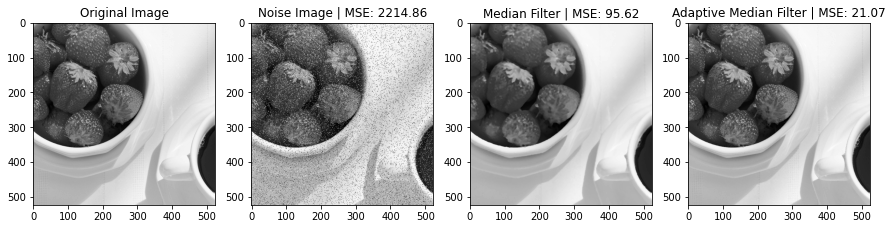

In [ ]:
P = 0.1
M_MAX = 2

src_noise = get_salt_pepper_noise(src, P)
dst_adpt = adaptive_median_filter(src_noise, M_MAX)
dst_median = cv2.medianBlur(src_noise, ksize=(M_MAX * 2) + 1)

mse_noise = ((src.astype(np.int) - src_noise) ** 2).mean()
mse_adpt = ((src.astype(np.int) - dst_adpt) ** 2).mean()
mse_median = ((src.astype(np.int) - dst_median) ** 2).mean()

# 3) Compare visualmente a imagem ruidosa com a imagem restaurada (tanto canal a canal, quanto a imagem com os 3 canais).
plt.figure(figsize = (15,8))
plt.subplot(141);plt.title("Original Image");plt.imshow(src, cmap='gray')
plt.subplot(142);plt.title(f"Noise Image | MSE: {mse_noise:0.2f}");plt.imshow(src_noise, cmap='gray')
plt.subplot(143);plt.title(f"Median Filter | MSE: {mse_median:0.2f}");plt.imshow(dst_median, cmap='gray')
plt.subplot(144);plt.title(f"Adaptive Median Filter | MSE: {mse_adpt:0.2f}");plt.imshow(dst_adpt, cmap='gray')